(solving-systems-using-irk-methods-section)=

# Solving Systems of ODEs using IRK Methods

Now that we know have to derive IRK methods we now move onto implementing them to solve IVPs. The stage values for a general 4-stage explicit Runge-Kutta method are

$$ \begin{align*}
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + c_2h, y_n + ha_{21}k_1), \\
    k_3 &= f(t_n + c_3h, y_n + h(a_{31}k_1 + a_{32}k_2)), \\
    k_4 &= f(t_n + c_4h, y_n + h(a_{41}k_1 + a_{42}k_2 + a_{43}k_3)).
\end{align*} $$

We have seen that it is straightforward to compute the stages sequentially since the value of $k_i$ only depends on the values of $k_1, \ldots, k_{i-1}$. The stage values for 4-stage implicit Runge-Kutta method are

$$ \begin{align*}
    k_1 &= f(t_n + c_1h, y_n + h(a_{11}k_1 + a_{12}k_2 + a_{13}k_3 + a_{14}k_4)), \\
    k_2 &= f(t_n + c_2h, y_n + h(a_{21}k_1 + a_{22}k_2 + a_{23}k_3 + a_{24}k_4)), \\
    k_3 &= f(t_n + c_3h, y_n + h(a_{31}k_1 + a_{32}k_2 + a_{33}k_3 + a_{34}k_4)), \\
    k_4 &= f(t_n + c_4h, y_n + h(a_{41}k_1 + a_{42}k_2 + a_{43}k_3 + a_{44}k_4)).
\end{align*} $$

Here is it not straightforward to compute the stage values since the value of $k_i$ depends upon the values of all stage values $k_1, \ldots, k_s$. When using an implicit method we need to compute the values of $k_i$ by solving a system of non-linear equations. 

Consider the solution of the IVP of the form

$$\mathbf{y}' = f(t, \mathbf{y}), \qquad t \in [t_0, t_{\max}], \qquad \mathbf{y}(0) = \mathbf{y}_0. $$

If there are $N$ equations in the system then

$$ \begin{align*}
    \mathbf{y} &= \begin{pmatrix} y_1 \\ \vdots \\ y_N \end{pmatrix}, &
    f(t, \mathbf{y}) &= \begin{pmatrix} f_1(t, \mathbf{y}) \\ \vdots \\ f_N(t, \mathbf{y}) \end{pmatrix}.
\end{align*} $$

Recall that the general form of a Runge-Kutta method for solving a system of ODEs is

$$ \begin{align*}
   \mathbf{y}_{n+1} &= \mathbf{y}_n + h \sum_{i=1}^s b_i \mathbf{k}_i,\\
   \mathbf{k}_i &= f(t_n +c_i h,\mathbf{y}_n + h \sum_{j=1}^s a_{ij} \mathbf{k}_j),
\end{align*} $$(general-irk-system)

To simplify the calculations to for implicit methods we introduce a vector $\mathbf{z}_i$, such that

$$\mathbf{z}_i = h \displaystyle\sum_{j=1}^s a_{ij} \mathbf{k}_j, $$(irk-zi)

and the expression for the stage values $\mathbf{k}_i$ becomes

$$\mathbf{k}_i = f(\mathbf{t}_n + c_ih, \mathbf{y}_n + \mathbf{z}_i). $$

Substituting this into equation {eq}`irk-zi` we have

$$ \begin{align*}
    \mathbf{z}_i = h \sum_{j = 1}^s a_{ij} f(t_n + c_j h, \mathbf{y}_n + \mathbf{z}_j). 
\end{align*} $$(irk-zi-2)

and also into equation {eq}`general-irk-system` gives

$$ \begin{align*}
   \mathbf{y}_{n+1} &= \mathbf{y}_n + h \sum_{i=1}^s b_i f(t_n + c_i h, \mathbf{y}_n + \mathbf{z}_i).
\end{align*} $$(irk-yn+1)

Using an $s$-stage IRK method, the values of $\mathbf{z}_i$ given by equation {eq}`irk-zi-2` are

$$ \begin{align*}
    \mathbf{z}_1 &= h (a_{11} f(t_n + c_1h, \mathbf{y}_n + \mathbf{z}_1) + \cdots + a_{1s} f(t_n + c_s h, \mathbf{y}_n + \mathbf{z}_s)), \\
    \vdots \\
    \mathbf{z}_s &= h (a_{s1} f(t_n + c_sh, \mathbf{y}_n + \mathbf{z}_1) + \cdots + a_{ss} f(t_n + c_s h, \mathbf{y}_n + \mathbf{z}_s)).
\end{align*}$$(irk-zi-3)

Writing this as a matrix equation

$$ \begin{align*}
    \begin{pmatrix} \mathbf{z}_1 \\ \vdots \\ \mathbf{z}_s \end{pmatrix}
    =
    \begin{pmatrix}
        h a_{11} f(t_n + c_1h, \mathbf{y}_n + \mathbf{z}_1) + \cdots + h a_{1s} f(t_n + c_sh, \mathbf{y}_n + \mathbf{z}_s) \\
        \vdots \\
        h a_{s1} f(t_n + c_1h, \mathbf{y}_n + \mathbf{z}_1) + \cdots + h a_{ss} f(t_n + c_sh, \mathbf{y}_n + \mathbf{z}_s) \\
    \end{pmatrix}.
\end{align*} $$(irk-zi-matrix-form-1)

Since $\mathbf{z}_i$ and $f(t_n + c_ih, \mathbf{y}_n + \mathbf{z}_i)$ are $N \times 1$ vectors then these matrices are $Ns \times 1$. We can replace the summation with matrix multiplications using a **Kronecker product**.

```{prf:definition} The Kronecker product

The <a href="https://en.wikipedia.org/wiki/Kronecker_product" target="_blank">Kronecker product</a> between an $m \times n$ matrix $A$ and another $p \times q$ matix $B$ is denoted by $A \otimes B$ and defined by

$$ \begin{align*} 
    A \otimes B =
    \begin{pmatrix} 
        a_{11} B & \cdots & a_{1n} B \\
        \vdots & \ddots & \vdots \\
        a_{m1} B & \cdots & a_{mn} B
    \end{pmatrix}.
\end{align*} $$

```

For example, if we have a 2-stage method so that $s = 2$ and a system of $N = 3$ ODEs

$$ \begin{align*}
    \begin{pmatrix} \mathbf{z}_1  \\ \mathbf{z}_2 \end{pmatrix}
    &= h
    \begin{pmatrix}
        a_{11} f(t_n + c_1h, \mathbf{y}_n + \mathbf{z}_1) + a_{12} f(t_n + c_2h, \mathbf{y}_n + \mathbf{z}_2) \\
        a_{21} f(t_n + c_1h, \mathbf{y}_n + \mathbf{z}_1) + a_{22} f(t_n + c_2h, \mathbf{y}_n + \mathbf{z}_2)
    \end{pmatrix}.
\end{align*} $$

Introducing a notation where $z_{i,j}$ and $f_{i,j}$ are the $j$-th elements of $\mathbf{z}_i$ and $f(t_n + c_ih, \mathbf{y}_n + \mathbf{z}_i)$ respectively, then this can be written as

$$ \begin{align*}
    \begin{pmatrix} z_{1,1} \\ z_{1,2} \\ z_{1,3} \\ z_{2,1} \\ z_{2,2} \\ z_{2,3}  \end{pmatrix}
    &= h
    \begin{pmatrix}
        a_{11} f_{1,1} + a_{12} f_{2,1} \\
        a_{11} f_{1,2} + a_{12} f_{2,2} \\
        a_{11} f_{1,3} + a_{12} f_{2,3} \\
        a_{21} f_{1,1} + a_{22} f_{2,1} \\
        a_{21} f_{1,2} + a_{22} f_{2,2} \\
        a_{21} f_{1,3} + a_{22} f_{2,3}
    \end{pmatrix}
    = h
    \begin{pmatrix} 
        a_{11} & 0 & 0 & a_{12} & 0 & 0 \\
        0 & a_{11} & 0 & 0 & a_{12} & 0 \\
        0 & 0 & a_{11} & 0 & 0 & a_{12} \\
        a_{21} & 0 & 0 & a_{22} & 0 & 0 \\
        0 & a_{21} & 0 & 0 & a_{22} & 0 \\
        0 & 0 & a_{21} & 0 & 0 & a_{22}
    \end{pmatrix}
    \begin{pmatrix}
        f_{1,1} \\
        f_{1,2} \\
        f_{1,3} \\
        f_{2,1} \\
        f_{2,2} \\
        f_{2,3}
    \end{pmatrix}
\end{align*} $$

The $6\times 6$ matrix is $A \otimes I_N$ so we can write the expression for the stage values $\mathbf{z}_i$ as

$$ \mathbf{z} = h (A \otimes I_N) F(\mathbf{z}), $$(irk-zi-matrix-form-2)

where 

$$ \begin{align*}
    \mathbf{z} &= \begin{pmatrix} \mathbf{z}_1 \\ \vdots \\ \mathbf{z}_s \end{pmatrix}, &
    F(\mathbf{z}) &= \begin{pmatrix} f(t_n + c_1h, \mathbf{y}_n + \mathbf{z}_1) \\ \vdots \\ f(t_n + c_s h, \mathbf{y}_n + \mathbf{z}_s) \end{pmatrix}.
\end{align*} $$

We can also use a Kronecker product to simplify the expression for $\mathbf{y}_{n+1}$ from equation {eq}`irk-yn+1`

$$ \mathbf{y}_{n+1} = \mathbf{y}_n + h (\mathbf{b}^\mathsf{T} \otimes I_N) F(\mathbf{z}). $$(irk-matrix-form)

---

## Newton's Method

The calculation of the stage values $\mathbf{z}_i$ using equation {eq}`irk-zi-matrix-form-2` requires the solution of a system of implicit equations. This is done using <a href="https://en.wikipedia.org/wiki/Newton%27s_method" target="_blank">Newton's method</a> which is a well known numerical method to computing the solutions of $g(x) = 0$ where $g$ is a differentiable function. Newton's method is written as

$$x^{(k+1)} = x^{(k)} - \frac{g(x^{(k)})}{g'(x^{(k)})}, $$(newtons-method)

where $x^{(k)}$ and $x^{(k+1)}$ are current and improved estimates of the solution $x$. The implementation of Newton's method begins with a guess value of $x^{(0)}$, and equation {eq}`newtons-method` is iterated until two successive estimates agree to some predefined tolerance.

Given a system of equations $g(\mathbf{x}) = \mathbf{0}$ where $g = (g_1, g_2, \ldots)$ are differentiable functions, then the matrix form of Newton's method is 

$$\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - J^{-1}g(\mathbf{x}^{(k)}),$$(newtons-method-system)

where $J$ is the Jacobian matrix 

$$ \begin{align*}
    J = 
    \begin{pmatrix}
        \dfrac{\partial g_1}{\partial x_1} & \cdots & \dfrac{\partial g_1}{\partial x_N} \\
        \vdots & \ddots & \vdots \\
        \dfrac{\partial g_N}{\partial x_1} & \cdots & \dfrac{\partial g_N}{\partial x_N}
    \end{pmatrix}.
\end{align*} $$

A problem we have here is that the calculation of the inverse $J^{-1}$ is an expensive calculation. So to avoid calculating a matrix inverse we use a two-stage process, let $\Delta \mathbf{x} = \mathbf{x}^{(k+1)} - \mathbf{x}^{(k)}$ then equation {eq}`newtons-method-system` can be written as

$$ J \Delta \mathbf{x} = -g(\mathbf{x}^{(k)}), $$(newton-1)

which is a linear system that can be solved to give $\Delta \mathbf{x}$. The improved estimate is then calculated using 

$$ \mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \Delta \mathbf{x}. $$(newton-2)

We cease iterating when the values of $\Delta x$ are below a given tolerance

$$ \| \Delta x \| < tol.$$

### Computing the values of $\mathbf{z}_i$ using Newton's method

We apply Newton's method for solving equation {eq}`irk-zi-matrix-form-2`. Writing it in the form $g(\mathbf{z}) = \mathbf{0}$ we have

$$ g(\mathbf{z}) = \mathbf{z} - h(A \otimes I) F(\mathbf{z}),$$

and the Jacobian matrix is

$$ \begin{align*}
    J &= I - h(A \otimes I) F'(\mathbf{z}) \\
    &= I - h
    \begin{pmatrix}
        a_{11} \frac{\partial}{\partial \mathbf{z}} f(t_n + c_1h, \mathbf{y}_n + \mathbf{z}_1) & 
        \cdots & 
        a_{1s} \frac{\partial}{\partial \mathbf{z}} f(t_n + c_sh, \mathbf{y}_n + \mathbf{z}_s) \\ 
        \vdots & & \vdots \\
        a_{s1} \frac{\partial}{\partial \mathbf{Y}} f(t_n + c_1h, \mathbf{y}_n + \mathbf{z}_1) & 
        \cdots & 
        a_{ss} \frac{\partial}{\partial \mathbf{z}} f(t_n + c_sh, \mathbf{y}_n + \mathbf{z}_s)
    \end{pmatrix}
\end{align*} $$

Note that each of the derivatives $\frac{\partial}{\partial \mathbf{z}}f(t_n + c_ih, \mathbf{y}_n +  \mathbf{z}_i)$ are $N \times N$ Jacobian matrices so $J$ is a $Ns \times Ns$ matrix. To save computational effort we can use the approximation

$$\frac{\partial}{\partial \mathbf{z}} f(t_n + c_ih, \mathbf{y}_n + \mathbf{z}_i) \approx \frac{\partial}{\partial \mathbf{y}} f(t_n, \mathbf{y}_n), $$

so we only need to calculate a single Jacobian matrix for each step. Using an approximation of the Jacobians in this way means that we may need more iterates, but this his more efficient than having fewer iterates and calculating $s^2$ Jacobians at each step. Another consideration we have is how to determine the derivatives in the Jacobian. We can approximate the derivatives using a second-order finite-difference approximation

$$ \frac{\partial}{\partial \mathbf{y}}f(t_n, \mathbf{y}_n) \approx \frac{f(t_n, \mathbf{y}_n + \epsilon) - f(t_n, \mathbf{y}_n - \epsilon)}{2\mathbf{\epsilon}},$$

where $\mathbf{\epsilon}$ is some small value. The Jacobian matrix $J$ is constant for all iterations of Newton's method in the same step, so the solution of the linear sytem in equation {eq}`newton-1` is well suited to [LU decomposition](lu-section).

---

## Applying an IRK to solve a system of ODEs

The steps used to solve an IVP using an IRK method are outlined in {prf:ref}`irk-algorithm`.

```{prf:algorithm} Solving an IVP using an IRK method
:label: irk-algorithm

**Inputs** A system of first-order ODEs of the form $\mathbf{y}' = f(t, \mathbf{y})$, a domain $t \in [t_0, t_{\max}]$, a vector of initial values $\mathbf{y}(t_0) = y_0$ and a value of the step length $h$

**Outputs** $(t_0, t_1, \ldots)$ and $(\mathbf{y}_0, \mathbf{y}_1, \ldots)$.

- $nsteps \gets \operatorname{int}\left( \dfrac{t_{\max} - t_0}{h} \right)$
- For $n = 0, \ldots, nsteps$
    - $J \gets \dfrac{\partial}{\partial \mathbf{y}} f(t_n, \mathbf{y}_n)$
    - $\mathbf{z} \gets \mathbf{0}$
    - For $k = 1, \ldots, 10$
        - $g(\mathbf{z}) \gets \mathbf{z} - h (A \otimes I_N) F(\mathbf{z})$
        - Solve the linear system $(I - h (A \otimes J)) \Delta \mathbf{z} = -g(\mathbf{z})$ for $\Delta \mathbf{z}$
        - $\mathbf{z} \gets \mathbf{z} + \Delta \mathbf{z}$
        - If $\| \Delta \mathbf{z} \| < tol$
            - break
    - $\mathbf{y}_{n+1} \gets \mathbf{y}_n + h (\mathbf{b}^T \otimes I_N) F(\mathbf{z})$
    - $t_{n+1} \gets t_n + h$
- Return $(t_0, t_1, \ldots)$ and $(\mathbf{y}_0, \mathbf{y}_1, \ldots)$
```

````{prf:example}

The van der Pol oscillator is a well known model of an oscillating system with non-linear damping described by the second-order ODE

$$ \ddot{y} - \mu (1 - y^2) \dot{y} + y = 0, $$

where $\mu$ is a scalar parameter that governs the strength of the damping. 

Use the Radau IA method to compute the solution to the van der Pol oscillator over the first 50 seconds where $y(0) = 1$ and $\mu = 10$. 

---

**Solution**

We need to rewrite the second-order ODE as a system of first-order ODEs. Let $y_1 = y$ and $y_2 = \dot{y}_1$ then

$$ \begin{align*}
    \dot{y}_1 &= y_2, \\
    \dot{y}_2 &= \mu (1 - y_1^2) y_2 - y_1,
\end{align*} $$

so 

$$ \begin{align*}
    \mathbf{y}&= \begin{pmatrix} y_1 \\ y_2 \end{pmatrix}, &
    f(t, \mathbf{y}) &= \begin{pmatrix} y_2 \\ \mu (1 - y_1^2) y_2 - y_1 \end{pmatrix}.
\end{align*} $$

The initial conditions are $\mathbf{y}_0 = (2, 0)$ and $\mu = 10$ and the Jacobian matrix for the first step is

$$ \begin{align*} 
    J &= 
    \begin{pmatrix}
        0 & 1 \\
        -2\mu y_1y_2 - 1 & \mu(1 - y_1^2)
    \end{pmatrix}
    =
    \begin{pmatrix}
        0 & 1 \\
        -1 & -30 
    \end{pmatrix}.
\end{align*} $$

The coefficients for the Radau IA method are

$$ \begin{align*}
    A &= \begin{pmatrix} \frac{1}{4} & -\frac{1}{4} \\ \frac{1}{4} & \frac{5}{12} \end{pmatrix}, &
    \mathbf{b} &= \begin{pmatrix} \frac{1}{4} \\ \frac{3}{4} \end{pmatrix} &
    \mathbf{c} &= \begin{pmatrix} 0 \\ \frac{2}{3} \end{pmatrix}.
\end{align*} $$

Using Newton's method to solve for $\mathbf{z}$ using zero starting values
then

$$ \begin{align*}
    \mathbf{z} &= \begin{pmatrix} \mathbf{z}_1 \\ \mathbf{z}_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \end{pmatrix}, &
    F(\mathbf{z}) &= 
    \begin{pmatrix}
        f(t_0 + 0h, \mathbf{y}_0 + \mathbf{z}_1) \\
        f(t_0 + \frac{2}{3}h, \mathbf{y}_0 + \mathbf{z}_2)
    \end{pmatrix}
    =
    \begin{pmatrix} 0 \\ -2 \\ 0 \\ -2 \end{pmatrix}
\end{align*} $$

and $g(\mathbf{z})$ is

$$ \begin{align*}
    g(\mathbf{z}) &= \mathbf{z} - (A \otimes I_2) F(\mathbf{z}) \\
    &= 
    \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \end{pmatrix} -
    \begin{pmatrix} 
        \frac{1}{4} & 0 & -\frac{1}{4} & 0 \\
        0 & \frac{1}{4} & 0 & -\frac{1}{4} \\
        \frac{1}{4} & 0 & \frac{5}{12} & 0 \\
        0 & \frac{1}{4} & 0 & \frac{5}{12}
    \end{pmatrix}
    \begin{pmatrix} 0 \\ -2 \\ 0 \\ -2 \end{pmatrix}
    =
    \begin{pmatrix} 0 \\ 0 \\ 0 \\ -\frac{4}{3} \end{pmatrix}.
\end{align*} $$

Solving $(I_2 - h(A \otimes J))\Delta \mathbf{z} = -g(\mathbf{z})$ for $\Delta \mathbf{z}$ gives

$$ \begin{align*}
    \Delta \mathbf{z}
    &=\begin{pmatrix} 0.0007 \\ -0.0222 \\ -0.0027 \\ -0.0518 \end{pmatrix},
\end{align*} $$

so the new estimate of $\mathbf{z}$ is

$$ \begin{align*}
    \mathbf{z} &= \mathbf{z} + \Delta \mathbf{z}
    =
    \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \end{pmatrix} +
    \begin{pmatrix} 0.0007 \\ -0.0222 \\ -0.0027 \\ -0.0518 \end{pmatrix}
    =
    \begin{pmatrix} 0.0007 \\ -0.0222 \\ -0.0027 \\ -0.0518 \end{pmatrix}
\end{align*}. $$

Here $\|\Delta \mathbf{z}\| = 0.0564 > 10^{-6}$ so we need to continue iterating. After three iterations $\mathbf{z}$ converges to the solution 

$$ \begin{align*}
    \mathbf{z} &= \begin{pmatrix} 0.0007 \\ -0.0222 \\ -0.0027 \\ -0.0519 \end{pmatrix}, &
    F(\mathbf{z}) &= \begin{pmatrix} -0.0222 \\ -0.1339 \\ -0.0519 \\ -0.4456 \end{pmatrix}.
\end{align*} $$

Calculating $\mathbf{y}_{1}$

$$ \begin{align*}
    \mathbf{y}_1 &= \mathbf{y_0} + h(\mathbf{b}^\mathsf{T} \otimes I_2) F(\mathbf{z}) \\
    &= 
    \begin{pmatrix} 2 \\ 0 \end{pmatrix} + 0.1
    \begin{pmatrix}
        \frac{1}{4} & 0 & \frac{1}{4} & 0 \\
        0 & \frac{3}{4} & 0 & \frac{3}{4} 
    \end{pmatrix}
    \begin{pmatrix} -0.0222 \\ -0.1339 \\ -0.0519 \\ -0.4456 \end{pmatrix}
    = \begin{pmatrix} 1.9956 \\ -0.0667 \end{pmatrix}.
\end{align*} $$

The solution over the full domain $t \in [0, 50]$ is shown in {numref}`vanderpol-plot-figure`.

```{glue:figure} vanderpol_plot
:name: vanderpol-plot-figure

Solution of the van der Pol oscillator where $\mu=10$ using the Radau IA IRK method.
```
````

---

## Code

The code below defines the functions `jac()` and `radauIA()` which computes the Jacobian of a function $f(t, y)$ and the solution to an initial value problem using the Radau IA method respectively.

`````{tab-set}
````{tab-item} Python
```python
def jac(f, t, y):
    J = np.zeros((len(y), len(y)))
    epsilon = 1e-6
    for i in range(len(y)):
        y_plus_epsilon = y.astype(float)
        y_minus_epsilon = y.astype(float)
        y_plus_epsilon[i] += epsilon
        y_minus_epsilon[i] -= epsilon
        J[:,i] = (f(t, y_plus_epsilon) - f(t,y_minus_epsilon)) / (2 * epsilon)

    return J


def radauIA(f, tpsan, y0, h):
    
    N = len(y0)
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros((N, nsteps + 1))
    t[0] = tspan[0]
    y[:,0] = y0
    
    A = np.array([[1/4, -1/4],
                  [1/4, 5/12]])
    b = np.array([1/4, 3/4])
    c = np.array([0, 2/3])
    s = 2

    for n in range(nsteps):
        z = np.zeros(N * s)
        F = np.zeros(N * s)
        J = jac(f, t[n], y[:,n])
        for k in range(10):
            F[:N] = f(t[n] + c[0] * h, y[:,n] + z[:N])
            F[N:] = f(t[n] + c[1] * h, y[:,n] + z[N:])
            g = z - h * np.dot(np.kron(A, np.eye(N)), F)
            delta_z = np.linalg.solve(np.eye(N * s) - h * np.kron(A, J), -g)
            z += delta_z
            if np.linalg.norm(delta_z) < 1e-6:
                break
        
        y[:,n+1] = y[:,n] + h * np.dot(np.kron(b.T, np.eye(N)), F)
        t[n+1] = t[n] + h

    return t, y.T
```

This code uses the following NumPy functions:

- `np.dot(A, B)` -- returns the matrix multiplication $AB$
- `np.kron(A, B)` -- returns the Kronecker product $A \otimes B$
- `np.linalg.solve(A, b)` -- returns the solution to the linear system $A \mathbf{x} = \mathbf{b}$
- `np.eye(n)` -- returns the $n \times n$ identity matrix
- `np.linalg.norm(a)` -- returns the Euclidean norm of the vector $\mathbf{a}$
````

````{tab-item} MATLAB
```matlab
function J = jac(f, t, y)

N = length(y);
J = zeros(N, N);
epsilon = 1e-2;
for i = 1 : N
    y_plus_epsilon = y;
    y_minus_epsilon = y;
    y_plus_epsilon(i) = y_plus_epsilon(i) + epsilon;
    y_minus_epsilon(i) = y_minus_epsilon(i) - epsilon;
    J(:, i) = (f(t, y_plus_epsilon) - f(t, y_minus_epsilon)) / (2 * epsilon);
end

end


function [t, y] = radauIA(f, tspan, y0, h)

N = length(y0);
nsteps = floor((tspan(2) - tspan(1)) / h);
t = zeros(nsteps + 1);
y = zeros(N, nsteps + 1);
t(1) = tspan(1);
y(:, 1) = y0;

A = [ 1/4, -1/4 ; 1/4, 5/12 ];
b = [ 1/4 ; 3/4 ];
c = [ 0 ; 2/3 ];
s = 2;

for n = 1 : nsteps

    z = zeros(N * s, 1);
    F = zeros(N * s, 1);
    J = jac(f, t(n), y(:,n));
    for k = 1 : 10
        F = [f(t(n) * c(1) * h, y(:, n) + z(1 : N)) ;
             f(t(n) * c(2) * h, y(:, n) + z(N + 1 : end))];
        g = z - h * kron(A, eye(N)) * F;
        delta_z = (eye(N * s) - h * kron(A, J)) \ -g;
        z = z + delta_z;
        if norm(delta_z) < 1e-6
            break
        end
    end

    y(:, n + 1) = y(:, n) + h * kron(b', eye(N)) * F;
    t(n + 1) = t(n) + h;
end

y = y';

end
```

This code uses the following functions:

- `kron(A, B)` -- returns the Kronecker product $A \otimes B$
- `A \ b` -- returns the solution to the linear system $A \mathbf{x} = \mathbf{b}$
- `eye(n)` -- returns the $n \times n$ identity matrix
- `norm(a)` -- returns the Euclidean norm of the vector $\mathbf{a}$

````
`````

```{note}
The solution of the linear system for Newton's method in the code above was done using NumPy's and MATLAB's linear system solvers. In practice, this is done using [LU decomposition](lu-section) which is more efficient in this case since the coefficient method is constant for all iterations in a step. I used NumPy's and MATLAB's solvers here since have yet to meet LU decomposition which is covered in [chapter 6](lu-section). 
```

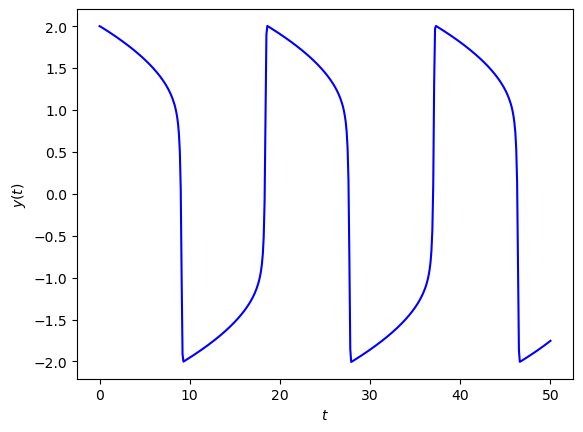

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def jac(f, t, y):
    J = np.zeros((len(y), len(y)))
    epsilon = 1e-6
    for i in range(len(y)):
        y_plus_epsilon = y.astype(float)
        y_minus_epsilon = y.astype(float)
        y_plus_epsilon[i] += epsilon
        y_minus_epsilon[i] -= epsilon
        J[:,i] = (f(t, y_plus_epsilon) - f(t,y_minus_epsilon)) / (2 * epsilon)

    return J


def radauIA(f, tpsan, y0, h):
    
    N = len(y0)
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros((N, nsteps + 1))
    t[0] = tspan[0]
    y[:,0] = y0
    
    A = np.array([[1/4, -1/4],
                  [1/4, 5/12]])
    b = np.array([1/4, 3/4])
    c = np.array([0, 2/3])
    s = 2

    for n in range(nsteps):
        z = np.zeros(N * s)
        F = np.zeros(N * s)
        J = jac(f, t[n], y[:,n])
        for k in range(10):
            F[:N] = f(t[n] + c[0] * h, y[:,n] + z[:N])
            F[N:] = f(t[n] + c[1] * h, y[:,n] + z[N:])
            g = z - h * np.dot(np.kron(A, np.eye(N)), F)
            delta_z = np.linalg.solve(np.eye(N * s) - h * np.kron(A, J), -g)
            z += delta_z
            if np.linalg.norm(delta_z) < 1e-6:
                break
        
        y[:,n+1] = y[:,n] + h * np.dot(np.kron(b.T, np.eye(N)), F)
        t[n+1] = t[n] + h

    return t, y.T


# Define van der Pol system
def vanderpol(t, y):
    return np.array([y[1], mu * (1 - y[0] ** 2) * y[1] - y[0]])


# Setup IVP
tspan = [0, 50];
y0 = [2, 0];
h = 0.1
mu = 10

# Solve IVP
t, y = radauIA(vanderpol, tspan, y0, h)

# Plot solution 
fig, ax = plt.subplots()
plt.plot(t, y[:,0], 'b')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.show()


from myst_nb import glue
glue("vanderpol_plot", fig, display=False)